<a href="https://colab.research.google.com/github/darko-k/MasterPy/blob/master/OCR001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python-headless

# Import libraries
import cv2
import pytesseract
from google.colab import files

# Upload the image
uploaded = files.upload()

# Load the uploaded image
for filename in uploaded.keys():
    image_path = filename

# Read the image using OpenCV
image = cv2.imread(image_path)

# Preprocess the image: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Optional: Apply thresholding to improve OCR accuracy
thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)[1]

# Perform OCR on the image
custom_config = r'--oem 3 --psm 6'  # Optimal Tesseract configuration
text_data = pytesseract.image_to_string(thresh, lang='eng+srp+bos', config=custom_config)

# Output the extracted text
print("Extracted Text:")
print(text_data)

# Save the extracted text to a file
output_file = "extracted_text.txt"
with open(output_file, "w", encoding="utf-8") as f:
    f.write(text_data)

# Download the extracted text file
from google.colab import files
files.download(output_file)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,192 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,531 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadco

Saving bih1.jpeg to bih1.jpeg
Extracted Text:
BOSNA | HERCEGOVINA LENA KARTA,
BOCHA Kt XEPLIEFOBHHA OSOBNA ISKAZNICA
BOSNIA AND HERZEGOVINA == JIMNHA KAPTA.
IDENTITY CARD
KOVACEVIE P20"
KOBAYEBHR =" > few
*
1G @! Sole ‘<)
: 3 ATRA-MARINA / a
7 ABPA-MAPHHA &
ee ge rscrr RA aT RARRICTIO :
time BIH / BAX
Bema avons rons;
14.02.1985
pumemesancomns/smucven  egommmorwam: BR ea EAD CT
771300217 01.03.2023



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import easyocr

# Initialize EasyOCR reader for Serbian and Latin
reader = easyocr.Reader(['sr', 'en'])

# OCR on the image
result = reader.readtext('passport_image.jpg')

# Display extracted text
for detection in result:
    print(detection[1])  # Text part of the result

In [ ]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize PaddleOCR for Serbian Cyrillic
ocr_cyrillic = PaddleOCR(use_angle_cls=True, lang='cyrillic', use_space_char=True)

# Initialize PaddleOCR for Serbian Latin
ocr_latin = PaddleOCR(use_angle_cls=True, lang='latin', use_space_char=True)

# Read the image (replace with your own image path)
image_path = "passport_image.jpg"
image = cv2.imread(image_path)

# Preprocess image for better OCR results
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization for better contrast
equalized = cv2.equalizeHist(gray)

# Use Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

# Apply Adaptive Thresholding to improve text clarity
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Perform OCR using both Cyrillic and Latin OCR models
result_cyrillic = ocr_cyrillic.ocr(thresh, cls=True)
result_latin = ocr_latin.ocr(thresh, cls=True)

# Print extracted text from both Cyrillic and Latin OCR results
print("Extracted Text (Cyrillic):")
for line in result_cyrillic[0]:
    print(line[1][0])

print("\nExtracted Text (Latin):")
for line in result_latin[0]:
    print(line[1][0])

# Visualize OCR results for Cyrillic
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes_cyrillic = [res[0] for res in result_cyrillic[0]]  # Bounding boxes for Cyrillic
texts_cyrillic = [res[1][0] for res in result_cyrillic[0]]  # Extracted text for Cyrillic
scores_cyrillic = [res[1][1] for res in result_cyrillic[0]]  # Confidence scores for Cyrillic

# Visualize results for Latin
boxes_latin = [res[0] for res in result_latin[0]]  # Bounding boxes for Latin
texts_latin = [res[1][0] for res in result_latin[0]]  # Extracted text for Latin
scores_latin = [res[1][1] for res in result_latin[0]]  # Confidence scores for Latin

# Use a good font for visualizing (default or specified font)
font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf'

# Draw the OCR results on the image for Cyrillic
visualized_image_cyrillic = draw_ocr(image_rgb, boxes_cyrillic, texts_cyrillic, scores_cyrillic, font_path=font_path)

# Draw the OCR results on the image for Latin
visualized_image_latin = draw_ocr(image_rgb, boxes_latin, texts_latin, scores_latin, font_path=font_path)

# Display the images with OCR results
plt.figure(figsize=(15, 15))

# Display Cyrillic OCR results
plt.subplot(1, 2, 1)
plt.imshow(visualized_image_cyrillic)
plt.title("Cyrillic OCR Results")
plt.axis('off')

# Display Latin OCR results
plt.subplot(1, 2, 2)
plt.imshow(visualized_image_latin)
plt.title("Latin OCR Results")
plt.axis('off')

plt.show()

In [ ]:
# Install necessary libraries
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python-headless
!sudo apt-get install -y tesseract-ocr tesseract-ocr-srp tesseract-ocr-bos tesseract-ocr-eng
# Import libraries
import cv2
import pytesseract
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Read the image using OpenCV
image = cv2.imread(image_path)

# Preprocess the image: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Optional: Apply thresholding to improve OCR accuracy
thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)[1]

# Perform OCR on the image
custom_config = r'--oem 3 --psm 6'  # Optimal Tesseract configuration
text_data = pytesseract.image_to_string(thresh, lang='srp', config=custom_config)

# Output the extracted text
print("Extracted Text:")
print(text_data)

# Save the extracted text to a file
output_file = "/content/drive/MyDrive/MyFolder/passport/extracted_text.txt"
with open(output_file, "w", encoding="utf-8") as f:
    f.write(text_data)

print(f"Extracted text saved to: {output_file}")

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
# Preprocessing: Apply denoising, resizing, and adaptive thresholding
import cv2

# Load the image
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image to make it larger
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

# Apply Gaussian blur to reduce noise
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Use adaptive thresholding to improve text visibility
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Save the preprocessed image (optional for debugging)
cv2.imwrite("/content/preprocessed_image.jpg", thresh)

True

In [ ]:
custom_config = r'--oem 3 --psm 4'
text_data = pytesseract.image_to_string(thresh, lang='eng+srp+bos', config=custom_config)

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 20.8 MB/s eta 0:00:00


In [ ]:
import easyocr

# Initialize EasyOCR reader
reader = easyocr.Reader(['en', 'bs'])  # English, Serbian, Bosnian

# Perform OCR
result = reader.readtext(image_path)

# Extract and print text
extracted_text = " ".join([item[1] for item in result])
print("Extracted Text:")
print(extracted_text)

Progress: |██████████████████████████████████████████████████| 100.0% CompleteExtracted Text:
BOSNA HERCEGOVINA LICNA KARTA BOCHA M XEPYEFOBMHA OSOBNA ISKAZNICA BOSNIA AND HERZEGOVINA JIMYHA KAPTA IDENTITY CARD Fkkli Ilhmi SuaAAai KOVACEVIC KOBAYEBMT 7AE AvEn Mama AZRA-MARINA A3PA-MAPVHA poa DRLAVLJANSTVO emaAaHCac ciiensene BIH BX Abuunu MATYMPohEHA P)lr liug / DTloerih Sgnaiuke 11.02.1985 Sekusi eRoy / CefnjcKH Gpoj/ SERLAL NuMBEr Yaii DO / YRLJEDK 0O Banm Ad / Kovacexc VJiu TT1300217 01.03.2023 SPECIMEN


In [ ]:
!pip install mrz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 3.1 MB/s eta 0:00:00


In [ ]:
from mrz.reader.td3 import TD3Code

# Extract MRZ from the OCR results
mrz_text = text_data.splitlines()[-2:]  # Last two lines often contain the MRZ
mrz = TD3Code("".join(mrz_text))

# Output parsed MRZ details
print(mrz.to_dict())

In [ ]:
# Install necessary libraries
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python-headless passporteye

# Import required libraries
from passporteye import read_mrz
import cv2

# Set the path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Use passporteye to read the MRZ
mrz = read_mrz(image_path)

# Check if MRZ was detected
if mrz is not None:
    # Parse the MRZ data
    mrz_data = mrz.to_dict()
    print("Extracted MRZ Data:")
    for key, value in mrz_data.items():
        print(f"{key}: {value}")
else:
    print("No MRZ detected in the image.")

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
# Install PaddleOCR and dependencies
!pip install paddlepaddle==2.5.1 paddleocr
!apt-get install -y poppler-utils  # For PDF-to-image conversion if needed

# Import necessary libraries
from paddleocr import PaddleOCR, draw_ocr
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive to access the image
drive.mount('/content/drive')

# Set the path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Initialize the PaddleOCR model
ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Supports multiple languages like 'en', 'ch', etc.

# Read the image using OpenCV
image = cv2.imread(image_path)

# Run OCR on the image
result = ocr.ocr(image_path, cls=True)

# Extract and print detected text
print("Extracted Text:")
for line in result[0]:
    print(line[1][0])  # Line contains text data

# Visualize results (optional)
# Convert OpenCV BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw OCR results on the image
boxes = [res[0] for res in result[0]]  # Bounding boxes
texts = [res[1][0] for res in result[0]]  # Texts
scores = [res[1][1] for res in result[0]]  # Confidence scores
visualized_image = draw_ocr(image_rgb, boxes, texts, scores, font_path='PaddleOCR/ppocr/utils/fonts/simfang.ttf')

# Display the image
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image)
plt.axis('off')
plt.show()

# Save the extracted text to a file
output_file = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr.txt"
with open(output_file, "w", encoding="utf-8") as f:
    for line in result[0]:
        f.write(line[1][0] + "\n")

print(f"Extracted text saved to: {output_file}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=5941f8af25afc6c26a47e1977afd53a8375f5ca152b591f8ed5386818f7b0ddb
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497

Error: Can not import paddle core while this file exists: /usr/local/lib/python3.10/dist-packages/paddle/fluid/libpaddle.so


ImportError: libssl.so.1.1: cannot open shared object file: No such file or directory

In [ ]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-12-08 21:14:55--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.83, 91.189.91.81, 185.125.190.82, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  2.71MB/s    in 0.5s    

2024-12-08 21:14:55 (2.71 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 123709 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real:

In [ ]:
!pip install paddlepaddle==2.5.1 paddleocr

In [ ]:
# Fix OpenSSL issue
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

# Install PaddleOCR and other dependencies
!pip install paddlepaddle==2.5.1 paddleocr
!apt-get install -y poppler-utils  # For PDF support, if needed

# Import necessary libraries
from paddleocr import PaddleOCR, draw_ocr
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive to access the image
drive.mount('/content/drive')

# Set the path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Initialize the PaddleOCR model
ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Supports multiple languages like 'en', 'ch', etc.

# Read the image using OpenCV
image = cv2.imread(image_path)

# Run OCR on the image
result = ocr.ocr(image_path, cls=True)

# Extract and print detected text
print("Extracted Text:")
for line in result[0]:
    print(line[1][0])  # Line contains text data

# Visualize results (optional)
# Convert OpenCV BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw OCR results on the image
boxes = [res[0] for res in result[0]]  # Bounding boxes
texts = [res[1][0] for res in result[0]]  # Texts
scores = [res[1][1] for res in result[0]]  # Confidence scores
visualized_image = draw_ocr(image_rgb, boxes, texts, scores, font_path='PaddleOCR/ppocr/utils/fonts/simfang.ttf')

# Display the image
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image)
plt.axis('off')
plt.show()

# Save the extracted text to a file
output_file = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr.txt"
with open(output_file, "w", encoding="utf-8") as f:
    for line in result[0]:
        f.write(line[1][0] + "\n")

print(f"Extracted text saved to: {output_file}")

--2024-12-08 21:15:41--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.83, 185.125.190.83, 91.189.91.81, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb.1’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  2.72MB/s    in 0.5s    

2024-12-08 21:15:42 (2.72 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb.1’ saved [1318204/1318204]

(Reading database ... 123719 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) over (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 i

100%|██████████| 3910/3910 [00:16<00:00, 231.95it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:18<00:00, 537.84it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:01<00:00, 1633.34it/s]


[2024/12/08 21:16:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

OSError: cannot open resource

In [ ]:
!sudo apt-get install -y tesseract-ocr tesseract-ocr-srp tesseract-ocr-bos tesseract-ocr-eng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-eng set to manually installed.
The following NEW packages will be installed:
  tesseract-ocr-bos tesseract-ocr-srp
0 upgraded, 2 newly installed, 0 to remove and 52 not upgraded.
Need to get 1,745 kB of archives.
After this operation, 4,678 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-bos all 1:4.00~git30-7274cfa-1.1 [965 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-srp all 1:4.00~git30-7274cfa-1.1 [780 kB]
Fetched 1,745 kB in 2s (847 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78,

In [ ]:
# Download a default font (if you don't have one)
!wget https://github.com/googlefonts/noto-fonts/blob/main/hinted/NotoSans-Regular.ttf?raw=true -O NotoSans-Regular.ttf

# Use the downloaded font in draw_ocr
font_path = "/content/NotoSans-Regular.ttf"

# Draw OCR results on the image
visualized_image = draw_ocr(image_rgb, boxes, texts, scores, font_path=font_path)

# Display the image
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image)
plt.axis('off')
plt.show()

--2024-12-08 21:20:00--  https://github.com/googlefonts/noto-fonts/blob/main/hinted/NotoSans-Regular.ttf?raw=true
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/notofonts/noto-fonts/blob/main/hinted/NotoSans-Regular.ttf?raw=true [following]
--2024-12-08 21:20:00--  https://github.com/notofonts/noto-fonts/blob/main/hinted/NotoSans-Regular.ttf?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 404 Not Found
2024-12-08 21:20:00 ERROR 404: Not Found.



OSError: unknown file format

In [ ]:
import cv2
import pytesseract

# Preprocess the image (thresholding for better OCR results)
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Specify Tesseract custom configurations
custom_config = r'--oem 3 --psm 6'  # Default configuration: OCR Engine Mode 3 and Page Segmentation Mode 6

# Extract text with Serbian Cyrillic, Bosnian, and English support
extracted_text = pytesseract.image_to_string(thresh, lang='eng+srp+bos', config=custom_config)

# Print the extracted text
print("Extracted Text:")
print(extracted_text)

# Optionally save the text to a file
output_file = "/content/drive/MyDrive/MyFolder/passport/extracted_text_tesseract.txt"
with open(output_file, "w", encoding="utf-8") as f:
    f.write(extracted_text)

print(f"Extracted text saved to: {output_file}")

Extracted Text:
BOSNA | HERCEGOVINA ШЕМА КАНТА.
БОСНА И: ХЕРЦЕГОВИНА OSOBNA ISKAZNICA
BOSNIA AND HERZEGOVINA == JIMNHA KAPTA.
IDENTITY CARD
KOVACEVIE P20"
КОВАЧЕВИЋ 7,27. ње
=
јФ 6: пази (|
, 3 ATRA-MARINA / a
о АЗРА-МАРИНА #
-- zaim RA aT RARRICTIO i u
Ž/M BIH / BAX
Bema avons rons;
14.02.1985
pio mas anvovnov si mo BIT NM RK ea EAD CT
771300217 01.03.2023

Extracted text saved to: /content/drive/MyDrive/MyFolder/passport/extracted_text_tesseract.txt


Extracted Text:
77 s 1.117 whee ee tay TR Pepe mp а ~ • "de i a + “eee “ety? a wey ‘yet
>", BOSNA | HERCEGOVINA 2; 7" МОМА КАРТА + 7 7 МЕ У
: 72, БОСНА М ХЕРЦЕГОВИНА •::; ОБОВМА КАЗМИСА 5: 19 37 7 | “ts
1: | BOSNIAAND HERZEGOVINA... AMMHAKAPTA 200 tr 7 one the, hte
eas a ман 4: љ 575 IDENMIN CARD Ep ios Eo oat, А
et ge? os ба ниси почне : у 12,8; i wep Coe ates Ра
РАЗНИ Роми : У И ee A
МЕ me LS ROVACEVIC NA РЕКА EON 7:
et a 5, КОВАЧЕВИЋ S AY A а] 2
2783 UGC Ce? PM ne sa ~ ~ 232: Ај У 337;
NEGO ve a 6 А тј о
hy ay er Sin temes foreseen Ž ; AX ту
ee у ЗА <> ee oe СОЈ ДРИНИ НИ be kar a"
МА OWE eS a AZRA MARINA Zo Ut ne Vee
2:55 Mae AY fee OB a ТЕ. ST
МР Ма АИ А АЗРАШАРИНА 7 ГИ ла синт у
па “4 athe |. i: Y А My MEL aD tn eerns gestae fo Es
2 ZA 19. ~ Ke mn PR pr a му
. SIM. fp Vemma ће 18. + Me BIH БИХ 22 У ЕУ;
Ae 54 Sa Ys rog te туре ке У А
~. Ки gt 5 _ u VREME Bele Ee Me Ag Ys
...: | ЧАЧАК ~, 13.02. 5 See TE Pa те ny
Па А Se ped њу ал, 170 198 "= oe {: "и aa
“2 зима. ВАЗЈ РСА ВАТ тај "ош

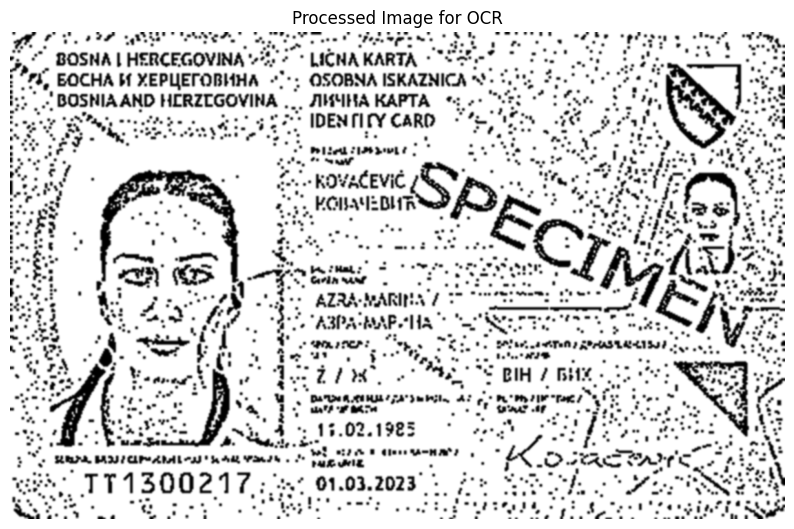

In [ ]:
import cv2
import pytesseract
import numpy as np

# Path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Load the image
image = cv2.imread(image_path)

# Step 1: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)

# Step 3: Remove noise with morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Step 4: Resize the image for better OCR accuracy
resized = cv2.resize(cleaned, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Step 5: Denoise the image using Gaussian Blur
denoised = cv2.GaussianBlur(resized, (5, 5), 0)

# Specify Tesseract custom configurations
custom_config = r'--oem 3 --psm 6'  # LSTM OCR engine, Assume a single block of text

# Run Tesseract OCR with multilingual support
extracted_text = pytesseract.image_to_string(denoised, lang='eng+srp+bos', config=custom_config)

# Print the extracted text
print("Extracted Text:")
print(extracted_text)

# Save the extracted text to a file
output_file = "/content/drive/MyDrive/MyFolder/passport/extracted_text_tesseract_enhanced.txt"
with open(output_file, "w", encoding="utf-8") as f:
    f.write(extracted_text)

print(f"Extracted text saved to: {output_file}")

# (Optional) Display the processed image
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(denoised, cmap='gray')
plt.title("Processed Image for OCR")
plt.axis('off')
plt.show()

In [ ]:
# Install PaddleOCR
!pip install paddleocr paddlepaddle==2.5.1

# Download and set up a model that supports Serbian (Cyrillic and Latin scripts)
!wget https://paddleocr.bj.bcebos.com/ppocr_server_v2.0/dict/sr_dict.txt -O sr_dict.txt

--2024-12-08 22:51:39--  https://paddleocr.bj.bcebos.com/ppocr_server_v2.0/dict/sr_dict.txt
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.47.176, 2409:8c04:1001:1203:0:ff:b0bb:4f27
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.47.176|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-12-08 22:51:41 ERROR 404: Not Found.



In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Initialize PaddleOCR with Serbian language settings
ocr = PaddleOCR(use_angle_cls=True, lang='custom', det_model_dir=None, rec_model_dir=None, cls_model_dir=None,
                rec_char_dict_path='./sr_dict.txt')  # Use a custom Serbian dictionary

# Preprocess the image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Perform OCR
result = ocr.ocr(image_path, cls=True)

# Print extracted text
print("Extracted Text:")
for line in result[0]:
    print(line[1][0])  # Extracted text

# Visualize results
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes = [res[0] for res in result[0]]  # Bounding boxes
texts = [res[1][0] for res[0]]  # Extracted text
scores = [res[1][1] for res[0]]  # Confidence scores
visualized_image = draw_ocr(image_rgb, boxes, texts, scores, font_path='NotoSansSerbian.ttf')

# Display the image
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image)
plt.axis('off')
plt.show()

# Save the results
output_file = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr_sr.txt"
with open(output_file, "w", encoding="utf-8") as f:
    for line in result[0]:
        f.write(line[1][0] + "\n")

print(f"Extracted text saved to: {output_file}")

SyntaxError: invalid syntax (<ipython-input-19-3505dfe66b7d>, line 32)

In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Initialize PaddleOCR with Serbian language settings
ocr = PaddleOCR(use_angle_cls=True, lang='sr')  # Serbian language model

# Preprocess the image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Perform OCR
result = ocr.ocr(image_path, cls=True)

# Print extracted text
print("Extracted Text:")
for line in result[0]:
    print(line[1][0])  # Extracted text

# Visualize results
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes = [res[0] for res in result[0]]  # Bounding boxes
texts = [res[1][0] for res in result[0]]  # Extracted text
scores = [res[1][1] for res in result[0]]  # Confidence scores
visualized_image = draw_ocr(image_rgb, boxes, texts, scores, font_path='/content/drive/MyDrive/MyFolder/fonts/NotoSansSerbian.ttf')

# Display the image with OCR results
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image)
plt.axis('off')
plt.show()

# Save the results
output_file = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr_sr.txt"
with open(output_file, "w", encoding="utf-8") as f:
    for line in result[0]:
        f.write(line[1][0] + "\n")

print(f"Extracted text saved to: {output_file}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


AssertionError: param lang must in dict_keys(['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari']), but got sr

In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Initialize PaddleOCR with Serbian Cyrillic and Latin language support
ocr = PaddleOCR(use_angle_cls=True, lang='cyrillic+latin')  # Use 'cyrillic' for Serbian Cyrillic, or 'latin' for Latin script

# Preprocess the image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Perform OCR
result = ocr.ocr(image_path, cls=True)

# Print extracted text
print("Extracted Text:")
for line in result[0]:
    print(line[1][0])  # Extracted text

# Visualize results
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes = [res[0] for res in result[0]]  # Bounding boxes
texts = [res[1][0] for res in result[0]]  # Extracted text
scores = [res[1][1] for res in result[0]]  # Confidence scores
visualized_image = draw_ocr(image_rgb, boxes, texts, scores, font_path='/content/drive/MyDrive/MyFolder/fonts/NotoSansSerbian.ttf')

# Display the image with OCR results
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image)
plt.axis('off')
plt.show()

# Save the results
output_file = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr_sr.txt"
with open(output_file, "w", encoding="utf-8") as f:
    for line in result[0]:
        f.write(line[1][0] + "\n")

print(f"Extracted text saved to: {output_file}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


AssertionError: param lang must in dict_keys(['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari']), but got cyrillic+latin

In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Initialize PaddleOCR with Serbian Cyrillic language
ocr_cyrillic = PaddleOCR(use_angle_cls=True, lang='cyrillic')  # For Serbian Cyrillic

# Initialize PaddleOCR with Serbian Latin language
ocr_latin = PaddleOCR(use_angle_cls=True, lang='latin')  # For Serbian Latin

# Preprocess the image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Perform OCR for Cyrillic text
result_cyrillic = ocr_cyrillic.ocr(image_path, cls=True)

# Perform OCR for Latin text
result_latin = ocr_latin.ocr(image_path, cls=True)

# Print extracted text for Cyrillic
print("Extracted Text (Cyrillic):")
for line in result_cyrillic[0]:
    print(line[1][0])  # Extracted text

# Print extracted text for Latin
print("\nExtracted Text (Latin):")
for line in result_latin[0]:
    print(line[1][0])  # Extracted text

# Visualize results for Cyrillic
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes_cyrillic = [res[0] for res in result_cyrillic[0]]  # Bounding boxes
texts_cyrillic = [res[1][0] for res in result_cyrillic[0]]  # Extracted text
scores_cyrillic = [res[1][1] for res in result_cyrillic[0]]  # Confidence scores
visualized_image_cyrillic = draw_ocr(image_rgb, boxes_cyrillic, texts_cyrillic, scores_cyrillic, font_path='/content/drive/MyDrive/MyFolder/fonts/NotoSansSerbian.ttf')

# Visualize results for Latin
boxes_latin = [res[0] for res in result_latin[0]]  # Bounding boxes
texts_latin = [res[1][0] for res in result_latin[0]]  # Extracted text
scores_latin = [res[1][1] for res in result_latin[0]]  # Confidence scores
visualized_image_latin = draw_ocr(image_rgb, boxes_latin, texts_latin, scores_latin, font_path='/content/drive/MyDrive/MyFolder/fonts/NotoSansSerbian.ttf')

# Display the image with OCR results for Cyrillic
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image_cyrillic)
plt.title("Cyrillic OCR")
plt.axis('off')
plt.show()

# Display the image with OCR results for Latin
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image_latin)
plt.title("Latin OCR")
plt.axis('off')
plt.show()

# Save the results for Cyrillic
output_file_cyrillic = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr_cyrillic.txt"
with open(output_file_cyrillic, "w", encoding="utf-8") as f:
    for line in result_cyrillic[0]:
        f.write(line[1][0] + "\n")

# Save the results for Latin
output_file_latin = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr_latin.txt"
with open(output_file_latin, "w", encoding="utf-8") as f:
    for line in result_latin[0]:
        f.write(line[1][0] + "\n")

print(f"Extracted Cyrillic text saved to: {output_file_cyrillic}")
print(f"Extracted Latin text saved to: {output_file_latin}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[2024/12/08 22:58:44] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.pa

100%|██████████| 9930/9930 [00:01<00:00, 5589.52it/s] 

[2024/12/08 22:58:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25,

[2024/12/08 22:58:49] ppocr DEBUG: dt_boxes num : 51, elapsed : 0.32430124282836914
[2024/12/08 22:58:50] ppocr DEBUG: cls num  : 51, elapsed : 0.47095823287963867
[2024/12/08 22:58:55] ppocr DEBUG: rec_res num  : 51, elapsed : 5.099869728088379
[2024/12/08 22:58:55] ppocr DEBUG: dt_boxes num : 33, elapsed : 0.5206983089447021
[2024/12/08 22:58:56] ppocr DEBUG: cls num  : 33, elapsed : 0.5090148448944092
[2024/12/08 22:59:02] ppocr DEBUG: rec_res num  : 33, elapsed : 5.9418370723724365
Extracted Text (Cyrillic):
BOEHE
HEFCEGOVINIA
КarТа
оенд
YEPLEГOEИHA
OEOEHA
IskаzNIEд
BSNIA
Aн
HERLEGOVIHE
личнд
кдрта
IdEнтт
SPECIMEN
KOVACEVIC
OEAHEEI
дэрагмдрина
нлдnдh
Bн
и
.7.
вђ
днндр
Koueect'c.
II1500?1:
ieDe.ze

Extracted Text (Latin):
BOSNAIHERCEGOVINA
LICNA KARTA
5OCHAMXEPLEFOBMHA
OSOBNAISKAZNICA
BOSNIAANDHERZEGOVINA
MYHA KAPTA
IDENTITY CARD
SURNAME
PREZIME/PEBMME/
SPECIMEN
KOVACEVIC
KOBA4EBHF
SME/HME7
GIVENNAME
AZRA-MARINA/
A3PA-MAPMHA
SPOL/nOA/
SEX
CITIZENSHIP
21X
BIH/5MX
DATUMRODENUA/AATYMPO

OSError: cannot open resource

In [ ]:
font_path='/content/drive/MyDrive/MyFolder/fonts/NotoSansSerbian.ttf'

In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Initialize PaddleOCR with Serbian Cyrillic language
ocr_cyrillic = PaddleOCR(use_angle_cls=True, lang='cyrillic')  # For Serbian Cyrillic

# Initialize PaddleOCR with Serbian Latin language
ocr_latin = PaddleOCR(use_angle_cls=True, lang='latin')  # For Serbian Latin

# Preprocess the image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Perform OCR for Cyrillic text
result_cyrillic = ocr_cyrillic.ocr(image_path, cls=True)

# Perform OCR for Latin text
result_latin = ocr_latin.ocr(image_path, cls=True)

# Print extracted text for Cyrillic
print("Extracted Text (Cyrillic):")
for line in result_cyrillic[0]:
    print(line[1][0])  # Extracted text

# Print extracted text for Latin
print("\nExtracted Text (Latin):")
for line in result_latin[0]:
    print(line[1][0])  # Extracted text

# Visualize results for Cyrillic
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes_cyrillic = [res[0] for res in result_cyrillic[0]]  # Bounding boxes
texts_cyrillic = [res[1][0] for res in result_cyrillic[0]]  # Extracted text
scores_cyrillic = [res[1][1] for res in result_cyrillic[0]]  # Confidence scores

# Use default font for testing
visualized_image_cyrillic = draw_ocr(image_rgb, boxes_cyrillic, texts_cyrillic, scores_cyrillic, font_path='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf')

# Visualize results for Latin
boxes_latin = [res[0] for res in result_latin[0]]  # Bounding boxes
texts_latin = [res[1][0] for res in result_latin[0]]  # Extracted text
scores_latin = [res[1][1] for res in result_latin[0]]  # Confidence scores
visualized_image_latin = draw_ocr(image_rgb, boxes_latin, texts_latin, scores_latin, font_path='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf')

# Display the image with OCR results for Cyrillic
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image_cyrillic)
plt.title("Cyrillic OCR")
plt.axis('off')
plt.show()

# Display the image with OCR results for Latin
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image_latin)
plt.title("Latin OCR")
plt.axis('off')
plt.show()

# Save the results for Cyrillic
output_file_cyrillic = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr_cyrillic.txt"
with open(output_file_cyrillic, "w", encoding="utf-8") as f:
    for line in result_cyrillic[0]:
        f.write(line[1][0] + "\n")

# Save the results for Latin
output_file_latin = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr_latin.txt"
with open(output_file_latin, "w", encoding="utf-8") as f:
    for line in result_latin[0]:
        f.write(line[1][0] + "\n")

print(f"Extracted Cyrillic text saved to: {output_file_cyrillic}")
print(f"Extracted Latin text saved to: {output_file_latin}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[2024/12/08 23:03:10] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.pa

OSError: cannot open resource

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[2024/12/08 23:06:59] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.pa

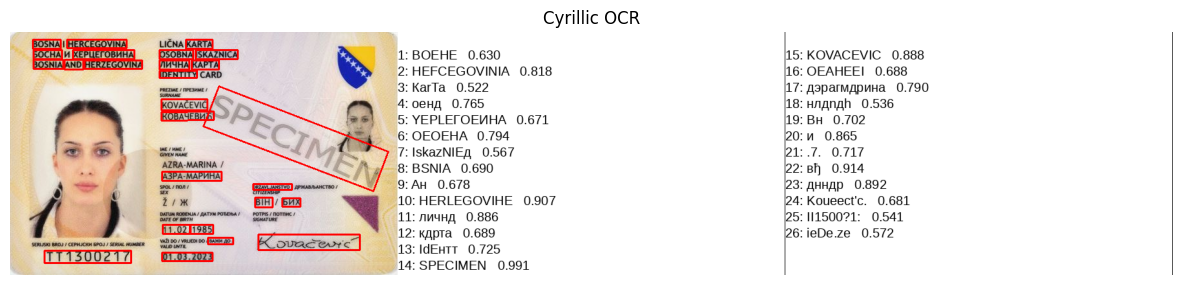

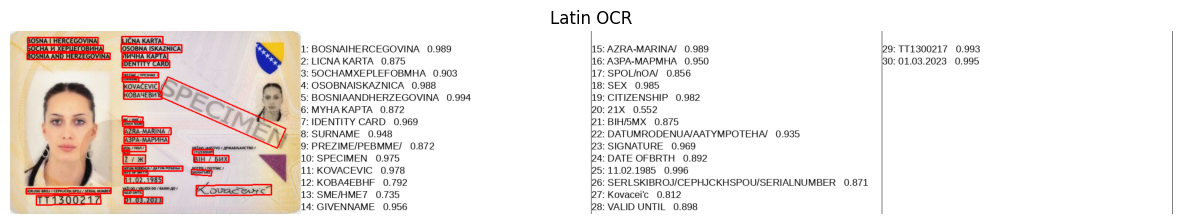

Extracted Cyrillic text saved to: /content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr_cyrillic.txt
Extracted Latin text saved to: /content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr_latin.txt


In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Initialize PaddleOCR with Serbian Cyrillic language
ocr_cyrillic = PaddleOCR(use_angle_cls=True, lang='cyrillic')  # For Serbian Cyrillic

# Initialize PaddleOCR with Serbian Latin language
ocr_latin = PaddleOCR(use_angle_cls=True, lang='latin')  # For Serbian Latin

# Preprocess the image
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Perform OCR for Cyrillic text
result_cyrillic = ocr_cyrillic.ocr(image_path, cls=True)

# Perform OCR for Latin text
result_latin = ocr_latin.ocr(image_path, cls=True)

# Print extracted text for Cyrillic
print("Extracted Text (Cyrillic):")
for line in result_cyrillic[0]:
    print(line[1][0])  # Extracted text

# Print extracted text for Latin
print("\nExtracted Text (Latin):")
for line in result_latin[0]:
    print(line[1][0])  # Extracted text

# Visualize results for Cyrillic
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes_cyrillic = [res[0] for res in result_cyrillic[0]]  # Bounding boxes
texts_cyrillic = [res[1][0] for res in result_cyrillic[0]]  # Extracted text
scores_cyrillic = [res[1][1] for res in result_cyrillic[0]]  # Confidence scores

# Use LiberationSans-Regular font
visualized_image_cyrillic = draw_ocr(image_rgb, boxes_cyrillic, texts_cyrillic, scores_cyrillic, font_path='/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf')

# Visualize results for Latin
boxes_latin = [res[0] for res in result_latin[0]]  # Bounding boxes
texts_latin = [res[1][0] for res in result_latin[0]]  # Extracted text
scores_latin = [res[1][1] for res in result_latin[0]]  # Confidence scores
visualized_image_latin = draw_ocr(image_rgb, boxes_latin, texts_latin, scores_latin, font_path='/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf')

# Display the image with OCR results for Cyrillic
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image_cyrillic)
plt.title("Cyrillic OCR")
plt.axis('off')
plt.show()

# Display the image with OCR results for Latin
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image_latin)
plt.title("Latin OCR")
plt.axis('off')
plt.show()

# Save the results for Cyrillic
output_file_cyrillic = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr_cyrillic.txt"
with open(output_file_cyrillic, "w", encoding="utf-8") as f:
    for line in result_cyrillic[0]:
        f.write(line[1][0] + "\n")

# Save the results for Latin
output_file_latin = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr_latin.txt"
with open(output_file_latin, "w", encoding="utf-8") as f:
    for line in result_latin[0]:
        f.write(line[1][0] + "\n")

print(f"Extracted Cyrillic text saved to: {output_file_cyrillic}")
print(f"Extracted Latin text saved to: {output_file_latin}")

In [ ]:
from paddleocr import PaddleOCR, draw_ocr
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Initialize PaddleOCR with Serbian Cyrillic and Latin language support
ocr = PaddleOCR(use_angle_cls=True, lang='cyrillic+latin', use_space_char=True)  # Supports both Cyrillic and Latin

# Read the image
image = cv2.imread(image_path)

# Improve image quality with preprocessing (e.g., denoising and adaptive thresholding)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# Adaptive thresholding to improve text clarity
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Perform OCR on the preprocessed image
result = ocr.ocr(thresh, cls=True)

# Print extracted text
print("Extracted Text:")
for line in result[0]:
    print(line[1][0])  # Extracted text

# Visualize results
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes = [res[0] for res in result[0]]  # Bounding boxes
texts = [res[1][0] for res in result[0]]  # Extracted text
scores = [res[1][1] for res in result[0]]  # Confidence scores

# Use a good font for visualizing
font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf'

# Draw the OCR results on the image
visualized_image = draw_ocr(image_rgb, boxes, texts, scores, font_path=font_path)

# Display the image with OCR results
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image)
plt.title("OCR Results")
plt.axis('off')
plt.show()

# Save the extracted text to a file
output_file = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr.txt"
with open(output_file, "w", encoding="utf-8") as f:
    for line in result[0]:
        f.write(line[1][0] + "\n")

print(f"Extracted text saved to: {output_file}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


AssertionError: param lang must in dict_keys(['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari']), but got cyrillic+latin

In [ ]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive to access image
drive.mount('/content/drive')

# Path to the image
image_path = "/content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

# Initialize PaddleOCR with Serbian Cyrillic and Latin language support
ocr = PaddleOCR(use_angle_cls=True, lang='cyrillic+latin', use_space_char=True)

# Read the image
image = cv2.imread(image_path)

# Preprocess image for better OCR results
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization for better contrast
equalized = cv2.equalizeHist(gray)

# Use Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

# Apply Adaptive Thresholding to improve text clarity
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Resize the image for better OCR (optional, depending on image size)
height, width = thresh.shape
new_width = 1200
new_height = int((new_width / width) * height)
resized_image = cv2.resize(thresh, (new_width, new_height))

# Perform OCR on the preprocessed image
result = ocr.ocr(resized_image, cls=True)

# Print extracted text
print("Extracted Text:")
for line in result[0]:
    print(line[1][0])  # Extracted text

# Visualize OCR results
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes = [res[0] for res in result[0]]  # Bounding boxes
texts = [res[1][0] for res in result[0]]  # Extracted text
scores = [res[1][1] for res in result[0]]  # Confidence scores

# Use a good font for visualizing (default or specified font)
font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf'

# Draw the OCR results on the image
visualized_image = draw_ocr(image_rgb, boxes, texts, scores, font_path=font_path)

# Display the image with OCR results
plt.figure(figsize=(15, 15))
plt.imshow(visualized_image)
plt.title("OCR Results")
plt.axis('off')
plt.show()

# Save the extracted text to a file
output_file = "/content/drive/MyDrive/MyFolder/passport/extracted_text_paddleocr.txt"
with open(output_file, "w", encoding="utf-8") as f:
    for line in result[0]:
        f.write(line[1][0] + "\n")

print(f"Extracted text saved to: {output_file}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


AssertionError: param lang must in dict_keys(['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari']), but got cyrillic+latin

In [ ]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


# Initialize PaddleOCR for Serbian Cyrillic
ocr_cyrillic = PaddleOCR(use_angle_cls=True, lang='cyrillic', use_space_char=True)

# Initialize PaddleOCR for Serbian Latin
ocr_latin = PaddleOCR(use_angle_cls=True, lang='latin', use_space_char=True)

# Read the image (replace with your own image path)
image_path = "content/drive/MyDrive/MyFolder/passport/bih1.jpeg"

image = cv2.imread(image_path)
image.show()

# Preprocess image for better OCR results
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization for better contrast
equalized = cv2.equalizeHist(gray)

# Use Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

# Apply Adaptive Thresholding to improve text clarity
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Perform OCR using both Cyrillic and Latin OCR models
result_cyrillic = ocr_cyrillic.ocr(thresh, cls=True)
result_latin = ocr_latin.ocr(thresh, cls=True)

# Print extracted text from both Cyrillic and Latin OCR results
print("Extracted Text (Cyrillic):")
for line in result_cyrillic[0]:
    print(line[1][0])

print("\nExtracted Text (Latin):")
for line in result_latin[0]:
    print(line[1][0])

# Visualize OCR results for Cyrillic
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes_cyrillic = [res[0] for res in result_cyrillic[0]]  # Bounding boxes for Cyrillic
texts_cyrillic = [res[1][0] for res in result_cyrillic[0]]  # Extracted text for Cyrillic
scores_cyrillic = [res[1][1] for res in result_cyrillic[0]]  # Confidence scores for Cyrillic

# Visualize results for Latin
boxes_latin = [res[0] for res in result_latin[0]]  # Bounding boxes for Latin
texts_latin = [res[1][0] for res in result_latin[0]]  # Extracted text for Latin
scores_latin = [res[1][1] for res in result_latin[0]]  # Confidence scores for Latin

# Use a good font for visualizing (default or specified font)
font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf'

# Draw the OCR results on the image for Cyrillic
visualized_image_cyrillic = draw_ocr(image_rgb, boxes_cyrillic, texts_cyrillic, scores_cyrillic, font_path=font_path)

# Draw the OCR results on the image for Latin
visualized_image_latin = draw_ocr(image_rgb, boxes_latin, texts_latin, scores_latin, font_path=font_path)

# Display the images with OCR results
plt.figure(figsize=(15, 15))

# Display Cyrillic OCR results
plt.subplot(1, 2, 1)
plt.imshow(visualized_image_cyrillic)
plt.title("Cyrillic OCR Results")
plt.axis('off')

# Display Latin OCR results
plt.subplot(1, 2, 2)
plt.imshow(visualized_image_latin)
plt.title("Latin OCR Results")
plt.axis('off')

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[2024/12/08 23:44:18] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.pa

AttributeError: 'NoneType' object has no attribute 'show'